In [3]:
import numpy as np
import cv2
import skimage.morphology as morp
import matplotlib.pyplot as plt
import math

#import skimage
from skimage import data, exposure, img_as_float32
from skimage.util import img_as_ubyte
from skimage.filters import rank
from skimage.exposure import match_histograms

from math import sqrt, floor, ceil
from PIL import Image

from my import cv2_imshow

DAMA_JPG = 'img/Dama.jpg'
LOW_JPG = 'img/low.jpg'
BUTTERFLY_PNG = 'img/butterfly.png'


## aff1

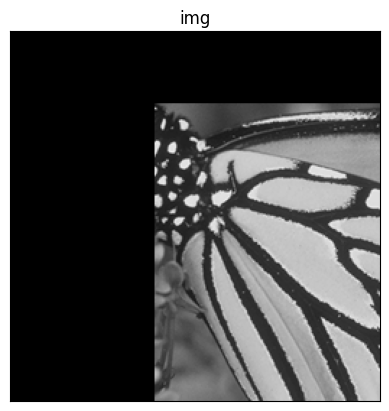

In [4]:
img = cv2.imread(BUTTERFLY_PNG,0)

rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow('img',dst)

## bilinear_inter

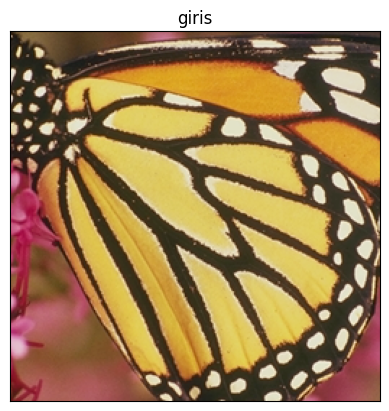

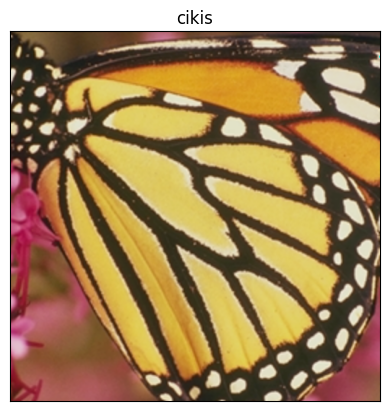

In [5]:
image = cv2.imread(BUTTERFLY_PNG)  # cv2.IMREAD_GRAYSCALE)
size = image.shape
dimension = (2*size[0], 2*size[1])

# from PIL import Image
# import math

# def bilinear_interpolation(image, dimension):
#     '''Bilinear interpolation method to convert small image to original image
#     Parameters:
#     img (numpy.ndarray): Small image
#     dimension (tuple): resizing image dimension
#     Returns:
#     numpy.ndarray: Resized image

height = image.shape[0]
width = image.shape[1]

scale_x = (width)/(dimension[1])
scale_y = (height)/(dimension[0])
new_image = np.zeros((dimension[0], dimension[1], image.shape[2]))

for k in range(3):
   for i in range(dimension[0]):
       for j in range(dimension[1]):
           x = (j+0.5) * (scale_x) - 0.5
           y = (i+0.5) * (scale_y) - 0.5

           x_int = int(x)
           y_int = int(y)
           x_int = min(x_int, width-2)
           y_int = min(y_int, height-2)

           x_diff = x - x_int
           y_diff = y - y_int

           a = image[y_int, x_int, k]
           b = image[y_int, x_int+1, k]
           c = image[y_int+1, x_int, k]
           d = image[y_int+1, x_int+1, k]

           pixel = a*(1-x_diff)*(1-y_diff) + b*(x_diff) * \
                    (1-y_diff) + c*(1-x_diff) * (y_diff) + d*x_diff*y_diff

           new_image[i, j, k] = pixel.astype(np.uint8)

new_img1 = new_image.astype(np.uint8)

cv2_imshow('giris', image)

cv2_imshow('cikis', new_img1)

## nearest_inter

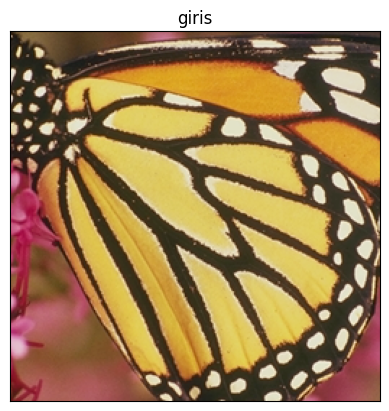

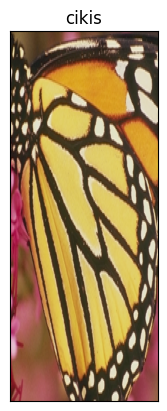

In [6]:

img = cv2.imread(BUTTERFLY_PNG)  # cv2.IMREAD_GRAYSCALE)
size = img.shape
# buyutme=5
buyutme1=5
buyutme2=2

dimension = (buyutme1*size[0], buyutme2*size[1])
    
    
new_image = np.zeros((dimension[0], dimension[1], img.shape[2]))

# buyutme = int(sqrt((dimension[0] * dimension[1]) / (img.shape[0]*img.shape[1])))
# buyutme=.5

for i in range(dimension[0]):
    for j in range(dimension[1]):
        row = floor(i / buyutme1)
        column = floor(j / buyutme2)

        new_image[i, j] = img[row, column]
new_img1 = new_image.astype(np.uint8)
# cv2_imshow((new_image, cv2.COLOR_BGR2RGB))

cv2_imshow('giris', img)

cv2_imshow('cikis', new_img1)

## nn_interp_main

Image size is: (256, 256, 3)
Smalled Image size is: (64, 64, 3)

........................Error calculate between the smalled image and the original image............................

Nearest Opencv Error Rate: 2.8892669677734375
Nearest Neighbor Error Rate: 14.966313680013021
Bilinear Opencv Error Rate: 2.7166398111979166
Bilinear Error Rate: 15.133468627929688
Cubiclinear Opencv Error Rate: 2.8679606119791665
Cubiclinear Error Rate: 14.495875040690104
Lanczos Error Rate: 2.896307169596354



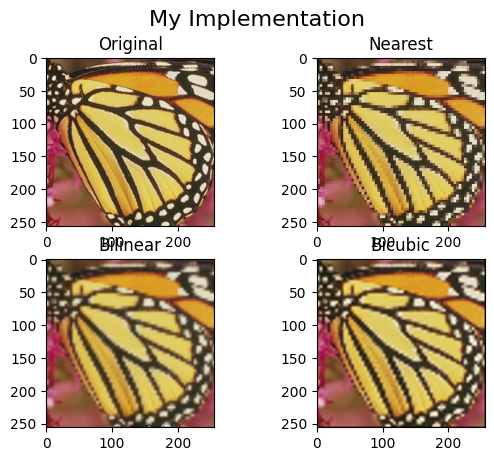

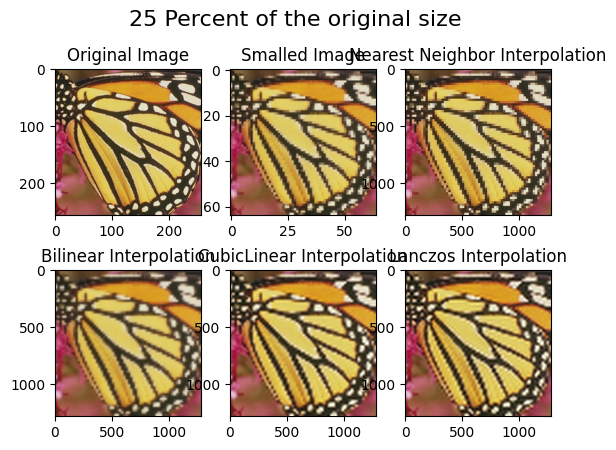

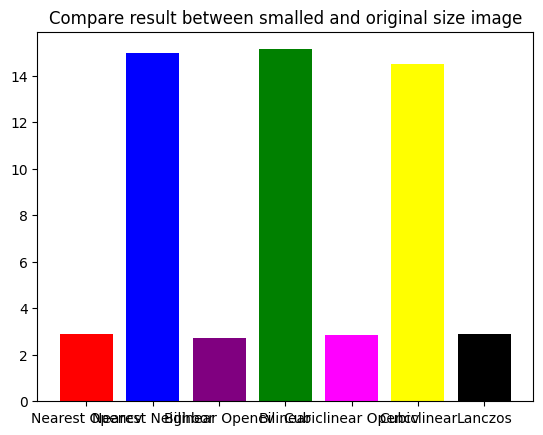

In [7]:
def read_image(path):
    '''Read image and return the image propertis.
    Parameters:
    path (string): Image path
    Returns:
    numpy.ndarray: Image exists in "path"
    list: Image size
    tuple: Image dimension (number of rows and columns)
    '''
    img = cv2.imread(path)  # cv2.IMREAD_GRAYSCALE)
    size = img.shape
    dimension = (size[0], size[1])

    return img, size, dimension


def image_change_scale(img, dimension, scale=500, interpolation=cv2.INTER_LINEAR):
    '''Resize image to a specificall scale of original image.
    Parameters:
    img (numpy.ndarray): Original image
    dimension (tuple): Original image dimension
    scale (int): Multiply the size of the original image
    Returns:
    numpy.ndarray: Resized image
    '''
    scale /= 100
    new_dimension = (int(dimension[1]*scale), int(dimension[0]*scale))
    resized_img = cv2.resize(img, new_dimension, interpolation=interpolation)

    return resized_img


def nearest_interpolation(image, dimension):
    '''Nearest neighbor interpolation method to convert small image to original image
    Parameters:
    img (numpy.ndarray): Small image
    dimension (tuple): resizing image dimension
    Returns:
    numpy.ndarray: Resized image
    '''
    new_image = np.zeros((dimension[0], dimension[1], image.shape[2]))

    enlarge_time = int(
        sqrt((dimension[0] * dimension[1]) / (image.shape[0]*image.shape[1])))

    for i in range(dimension[0]):
        for j in range(dimension[1]):
            row = floor(i / enlarge_time)
            column = floor(j / enlarge_time)

            new_image[i, j] = image[row, column]

    return new_image


def bilinear_interpolation(image, dimension):
    '''Bilinear interpolation method to convert small image to original image
    Parameters:
    img (numpy.ndarray): Small image
    dimension (tuple): resizing image dimension
    Returns:
    numpy.ndarray: Resized image
    '''
    height = image.shape[0]
    width = image.shape[1]

    scale_x = (width)/(dimension[1])
    scale_y = (height)/(dimension[0])

    new_image = np.zeros((dimension[0], dimension[1], image.shape[2]))

    for k in range(3):
        for i in range(dimension[0]):
            for j in range(dimension[1]):
                x = (j+0.5) * (scale_x) - 0.5
                y = (i+0.5) * (scale_y) - 0.5

                x_int = int(x)
                y_int = int(y)

                # Prevent crossing
                x_int = min(x_int, width-2)
                y_int = min(y_int, height-2)

                x_diff = x - x_int
                y_diff = y - y_int

                a = image[y_int, x_int, k]
                b = image[y_int, x_int+1, k]
                c = image[y_int+1, x_int, k]
                d = image[y_int+1, x_int+1, k]

                pixel = a*(1-x_diff)*(1-y_diff) + b*(x_diff) * \
                    (1-y_diff) + c*(1-x_diff) * (y_diff) + d*x_diff*y_diff

                new_image[i, j, k] = pixel.astype(np.uint8)

    return new_image


def W(x):
    '''Weight function that return weight for each distance point
    Parameters:
    x (float): Distance from destination point
    Returns:
    float: Weight
    '''
    a = -0.5
    pos_x = abs(x)
    if -1 <= abs(x) <= 1:
        return ((a+2)*(pos_x**3)) - ((a+3)*(pos_x**2)) + 1
    elif 1 < abs(x) < 2 or -2 < x < -1:
        return ((a * (pos_x**3)) - (5*a*(pos_x**2)) + (8 * a * pos_x) - 4*a)
    else:
        return 0


def bicubic_interpolation(img, dimension):
    '''Bicubic interpolation method to convert small size image to original size image
    Parameters:
    img (numpy.ndarray): Small image
    dimension (tuple): resizing image dimension
    Returns:
    numpy.ndarray: Resized image
    '''
    nrows = dimension[0]
    ncols = dimension[1]

    output = np.zeros((nrows, ncols, img.shape[2]), np.uint8)
    for c in range(img.shape[2]):
        for i in range(nrows):
            for j in range(ncols):
                xm = (i + 0.5) * (img.shape[0]/dimension[0]) - 0.5
                ym = (j + 0.5) * (img.shape[1]/dimension[1]) - 0.5

                xi = floor(xm)
                yi = floor(ym)

                u = xm - xi
                v = ym - yi

                # -------------- Using this make ignore some points and increase the value of black in image border
                # x = [(xi - 1), xi, (xi + 1), (xi + 2)]
                # y = [(yi - 1), yi, (yi + 1), (yi + 2)]
                # if ((x[0] >= 0) and (x[3] < img.shape[1]) and (y[0] >= 0) and (y[3] < img.shape[0])):
                #     dist_x0 = W(x[0] - xm)
                #     dist_x1 = W(x[1] - xm)
                #     dist_x2 = W(x[2] - xm)
                #     dist_x3 = W(x[3] - xm)
                #     dist_y0 = W(y[0] - ym)
                #     dist_y1 = W(y[1] - ym)
                #     dist_y2 = W(y[2] - ym)
                #     dist_y3 = W(y[3] - ym)

                #     out = (img[x[0], y[0], c] * (dist_x0 * dist_y0) +
                #            img[x[0], y[1], c] * (dist_x0 * dist_y1) +
                #            img[x[0], y[2], c] * (dist_x0 * dist_y2) +
                #            img[x[0], y[3], c] * (dist_x0 * dist_y3) +
                #            img[x[1], y[0], c] * (dist_x1 * dist_y0) +
                #            img[x[1], y[1], c] * (dist_x1 * dist_y1) +
                #            img[x[1], y[2], c] * (dist_x1 * dist_y2) +
                #            img[x[1], y[3], c] * (dist_x1 * dist_y3) +
                #            img[x[2], y[0], c] * (dist_x2 * dist_y0) +
                #            img[x[2], y[1], c] * (dist_x2 * dist_y1) +
                #            img[x[2], y[2], c] * (dist_x2 * dist_y2) +
                #            img[x[2], y[3], c] * (dist_x2 * dist_y3) +
                #            img[x[3], y[0], c] * (dist_x3 * dist_y0) +
                #            img[x[3], y[1], c] * (dist_x3 * dist_y1) +
                #            img[x[3], y[2], c] * (dist_x3 * dist_y2) +
                #            img[x[3], y[3], c] * (dist_x3 * dist_y3))

                #     output[i, j, c] = np.clip(out, 0, 255)
                # ---------------------------

                out = 0
                for n in range(-1, 3):
                    for m in range(-1, 3):
                        if ((xi + n < 0) or (xi + n >= img.shape[1]) or (yi + m < 0) or (yi + m >= img.shape[0])):
                            continue

                        out += (img[xi+n, yi+m, c] * (W(u - n) * W(v - m)))

                output[i, j, c] = np.clip(out, 0, 255)

    return output


def error_calculator(img1, img2):
    '''Calculate the average difference between the image pixels and returns a number.
    Parameters:
    image (numpy.ndarray): Interpolated image
    image (numpy.ndarray): Original image
    Returns:
    float: Average difference between two images
    '''
    return np.average(abs(np.array(img1, dtype="int16") -
                          np.array(img2, dtype="int16")))


def error_calculator_manual(img1, img2):
    '''Calculate the average difference between the image pixels and returns a number.
    Parameters:
    image (numpy.ndarray): Interpolated image
    image (numpy.ndarray): Original image
    Returns:
    float: Average difference between two images
    '''
    result = 0

    img1 = np.array(img1, dtype="int16")
    img2 = np.array(img2, dtype="int16")

    for i, j in zip(img1, img2):
        for k, l in zip(i, j):
            for v in range(len(k)):
                result += abs(k[v] - l[v])

    if len(img1.shape) == 3:
        return result/(img1.shape[0] * img1.shape[1] * img1.shape[2])
    else:
        return result/(img1.shape[0] * img1.shape[1])


def show_result(images_list):
    '''Show result of each image action.
    Parameters:
    images list (list): List of all images
    Returns
    '''
    titles = list(images_list.keys())
    images = list(images_list.values())

    fig, axs = plt.subplots(2, 3)
    fig.suptitle('25 Percent of the original size', fontsize=16)

    axs[0, 0].set_title(titles[0])
    axs[0, 0].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))

    axs[0, 1].set_title(titles[1])
    axs[0, 1].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))

    axs[0, 2].set_title(titles[2])
    axs[0, 2].imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))

    axs[1, 0].set_title(titles[3])
    axs[1, 0].imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))

    axs[1, 1].set_title(titles[4])
    axs[1, 1].imshow(cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB))

    axs[1, 2].set_title(titles[5])
    axs[1, 2].imshow(cv2.cvtColor(images[5], cv2.COLOR_BGR2RGB))


def result_comparison(error_list, color):
    '''Error rate comparison between the different interpolation methods.
    Parameters:
    error (list): Error rates
    Returns
    '''
    interpolation_methods = ["Nearest Opencv", "Nearest Neighbor",
                             "Bilinear Opencv", "Bilinear", "Cubiclinear Opencv", "Cubiclinear", "Lanczos"]

    print("\n........................Error calculate between the smalled image and the original image............................\n")
    print(f"{interpolation_methods[0]} Error Rate: {error_list[0]}")
    print(f"{interpolation_methods[1]} Error Rate: {error_list[1]}")
    print(f"{interpolation_methods[2]} Error Rate: {error_list[2]}")
    print(f"{interpolation_methods[3]} Error Rate: {error_list[3]}")
    print(f"{interpolation_methods[4]} Error Rate: {error_list[4]}")
    print(f"{interpolation_methods[5]} Error Rate: {error_list[5]}")
    print(f"{interpolation_methods[6]} Error Rate: {error_list[6]}\n")

    plt.figure()
    plt.bar(interpolation_methods, error_list, color=[
            'red', 'blue', 'purple', 'green', 'fuchsia', 'yellow', 'black'])
    plt.title("Compare result between smalled and original size image")


def main():
    images_list = {}

    # Read Image
    img, size, dimension = read_image(BUTTERFLY_PNG)
    print(f"Image size is: {size}")
    images_list['Original Image'] = img

    # Change Image Size
    scale_percent = 25  # percent of original image size
    resized_img = image_change_scale(img, dimension, scale_percent)
    print(f"Smalled Image size is: {resized_img.shape}")
    images_list['Smalled Image'] = resized_img

    fig, axs = plt.subplots(2, 2)
    fig.suptitle('My Implementation', fontsize=16)

    # Change image to original size using nearest neighbor interpolation
    nn_img = image_change_scale(
        resized_img, dimension, interpolation=cv2.INTER_NEAREST)
    images_list['Nearest Neighbor Interpolation'] = nn_img

    nn_img_algo = nearest_interpolation(resized_img, dimension)
    nn_img_algo = Image.fromarray(nn_img_algo.astype('uint8')).convert('RGB')

    # Change image to original size using bilinear interpolation
    bil_img = image_change_scale(
        resized_img, dimension, interpolation=cv2.INTER_LINEAR)
    images_list['Bilinear Interpolation'] = bil_img

    bil_img_algo = bilinear_interpolation(resized_img, dimension)
    bil_img_algo = Image.fromarray(bil_img_algo.astype('uint8')).convert('RGB')

    # Change image to original size using cubiclinear interpolation (4*4 pixel neighborhood)
    cubic_img = image_change_scale(
        resized_img, dimension, interpolation=cv2.INTER_CUBIC)
    images_list['CubicLinear Interpolation'] = cubic_img

    # cubic_img_algo = BiCubic_interpolation(
    #     resized_img, dimension[0], dimension[1])
    cubic_img_algo = bicubic_interpolation(resized_img, dimension)
    cubic_img_algo = Image.fromarray(
        cubic_img_algo.astype('uint8')).convert('RGB')

    # Change image to original size using lanczos interpolation (8*8 pixel neighborhood)
    czos_img = image_change_scale(
        resized_img, dimension, interpolation=cv2.INTER_LANCZOS4)
    images_list['Lanczos Interpolation'] = czos_img

    # error calculate between the smalled image and the original image
    error_list = []
    error_list.append(error_calculator_manual(nn_img, img))
    error_list.append(error_calculator_manual(nn_img_algo, img))
    error_list.append(error_calculator_manual(bil_img, img))
    error_list.append(error_calculator_manual(bil_img_algo, img))
    error_list.append(error_calculator_manual(cubic_img, img))
    error_list.append(error_calculator_manual(cubic_img_algo, img))
    error_list.append(error_calculator_manual(czos_img, img))

    # Show Result
    show_result(images_list)

    # Result Comparison
    result_comparison(error_list, "blue")

    axs[0, 0].set_title("Original")
    axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    axs[0, 1].set_title("Nearest")
    axs[0, 1].imshow(cv2.cvtColor(np.array(nn_img_algo), cv2.COLOR_BGR2RGB))

    axs[1, 0].set_title("Bilinear")
    axs[1, 0].imshow(cv2.cvtColor(np.array(bil_img_algo), cv2.COLOR_BGR2RGB))

    axs[1, 1].set_title("Bicubic")
    axs[1, 1].imshow(cv2.cvtColor(np.array(cubic_img_algo), cv2.COLOR_BGR2RGB))

    # plt.grid()
    plt.show()

    


if __name__ == "__main__":
    main()

## image1_GeometTrnsf

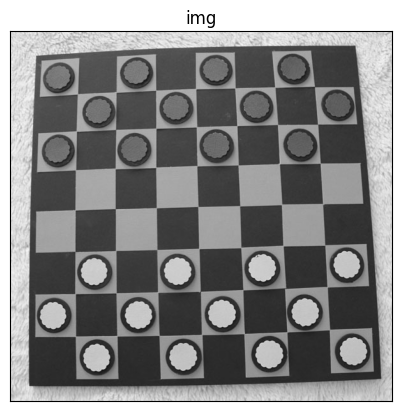

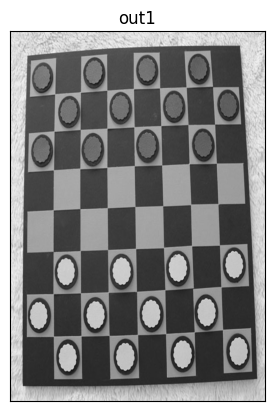

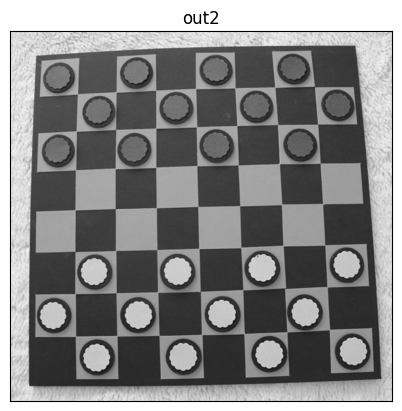

In [8]:
img = cv2.imread(DAMA_JPG,0)

res = cv2.resize(img,None,fx=2, fy=3, interpolation = cv2.INTER_CUBIC)
res1 = cv2.resize(res,None,fx=3, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

# height, width = img.shape[:2]
# res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

cv2_imshow('img', img)
cv2_imshow('out1', res)
cv2_imshow('out2', res1)

## image1_AffineTrnsf

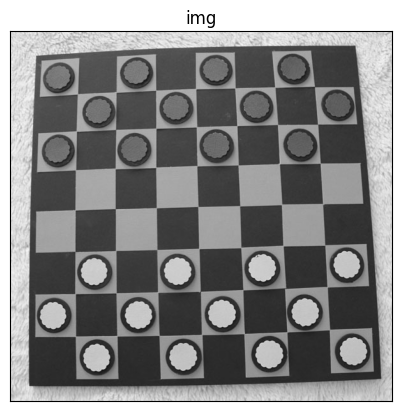

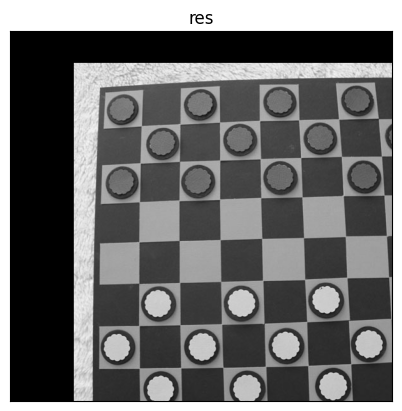

In [9]:
img = cv2.imread(DAMA_JPG, 0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))


cv2_imshow('img', img)
cv2_imshow('res',dst)


## image1_AffineTrnsf2

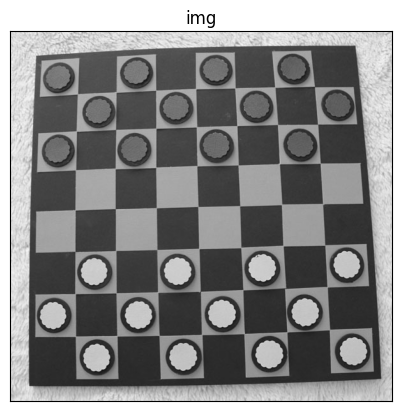

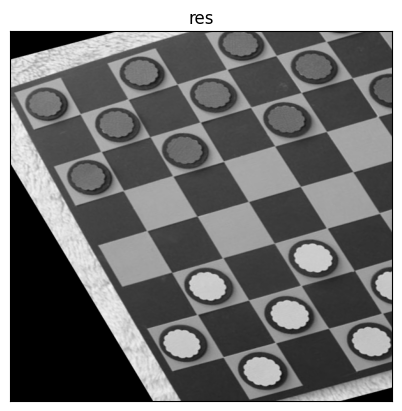

In [10]:
img = cv2.imread(DAMA_JPG, 0)
rows,cols = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2_imshow('img', img)
cv2_imshow('res',dst)


## image1_PerspectiveTrnsf

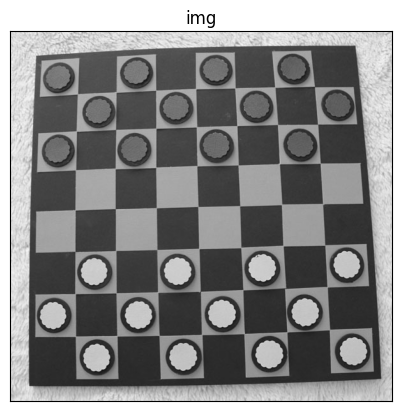

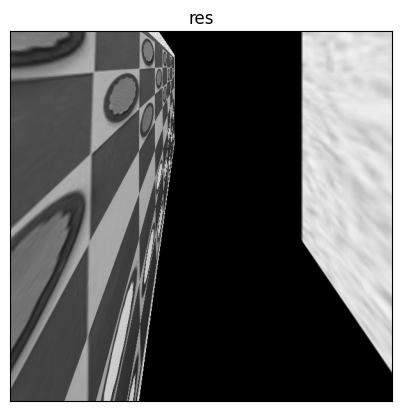

In [11]:
img = cv2.imread(DAMA_JPG, 0)
rows,cols = img.shape

#pts1 = np.float32([[0,0],[0,219],[228,0],[228,219],[86,97],[110,97],[86,122],[110,122]])
#pts2 = np.float32([[0,0],[0,219],[228,0],[228,219],[106,97],[130,97],[106,122],[130,122]])

pts1 = np.float32([[86,97],[110,97],[86,122],[110,122]])
pts2 = np.float32([[60,60],[140,60],[60,140],[140,110]])

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(cols,rows))


cv2_imshow('img', img)
cv2_imshow('res',dst)


## image1_rotate

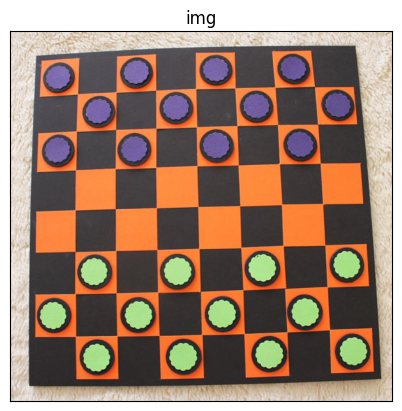

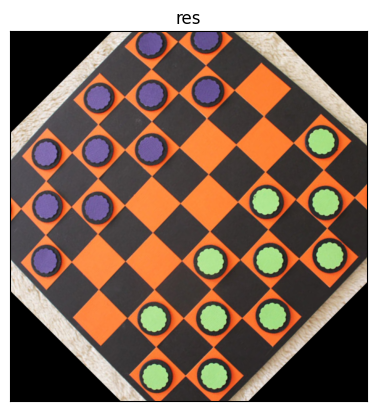

In [12]:
img = cv2.imread(DAMA_JPG, 1)

rows,cols, _ = img.shape

center = (rows / 2, cols / 2)

angle45 = 45
angle180 = 180
angle270 = 270

scale = 1.0

# Perform the counter clockwise rotation holding at the center

M = cv2.getRotationMatrix2D(center, angle45, scale)
dst = cv2.warpAffine(img, M, (rows, cols))

cv2_imshow('img', img)
cv2_imshow('res',dst)
